In [ ]:
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pathlib
import datetime

import datetime
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from tqdm import tqdm

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

# printout versions
print(f"Tensor Flow Version: {tf.__version__}")
print(f"numpy Version: {np.version.version}")

Tensor Flow Version: 2.12.0
numpy Version: 1.23.5


In [ ]:
data_dir = pathlib.Path("/content/drive/MyDrive/Facial recognition project/Dataset/train")
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)
# classnames in the dataset specified
CLASS_NAMES = np.array([item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt" ])
print(CLASS_NAMES)
# print length of class names
output_class_units = len(CLASS_NAMES)
print(output_class_units)

28709
['neutral' 'happy' 'fear' 'sad' 'surprise' 'angry' 'disgust']
7


In [ ]:
#path to write the split data to:
data_dir2 = pathlib.Path("/content/drive/MyDrive/Facial recognition project/Dataset/test")

BATCH_SIZE = 64             # Can be of size 2^n, but not restricted to. for the better utilization of memory

IMG_HEIGHT = 227            # input Shape required by the model this can't be modified.
IMG_WIDTH = 227             # input Shape required by the model

STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)

# Rescaling the pixel values from 0~255 to 0~1 For RGB Channels of the image.
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# training_data for model training
train_data_gen = image_generator.flow_from_directory(directory=str(data_dir),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH), #Resizing the raw dataset
                                                     classes = list(CLASS_NAMES))

val_data_gen = image_generator.flow_from_directory(directory=str(data_dir2),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH), #Resizing the raw dataset
                                                     classes = list(CLASS_NAMES))

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
!pip install tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 9.8 MB/s eta 0:00:00


In [ ]:
# AlexNet model
class AlexNet(Sequential):
    def __init__(self, input_shape, num_classes):
        super().__init__()

        self.add(Conv2D(96, kernel_size=(11,11), strides= 4,
                        padding= 'valid', activation= 'relu',
                        input_shape= input_shape,
                        kernel_initializer= 'he_normal'))
        self.add(MaxPooling2D(pool_size=(3,3), strides= (2,2),
                              padding= 'valid', data_format= None))

        self.add(Conv2D(256, kernel_size=(5,5), strides= 1,
                        padding= 'same', activation= 'relu',
                        kernel_initializer= 'he_normal'))
        self.add(MaxPooling2D(pool_size=(3,3), strides= (2,2),
                              padding= 'valid', data_format= None))

        self.add(Conv2D(384, kernel_size=(3,3), strides= 1,
                        padding= 'same', activation= 'relu',
                        kernel_initializer= 'he_normal'))

        self.add(Conv2D(384, kernel_size=(3,3), strides= 1,
                        padding= 'same', activation= 'relu',
                        kernel_initializer= 'he_normal'))

        self.add(Conv2D(256, kernel_size=(3,3), strides= 1,
                        padding= 'same', activation= 'relu',
                        kernel_initializer= 'he_normal'))

        self.add(MaxPooling2D(pool_size=(3,3), strides= (2,2),
                              padding= 'valid', data_format= None))

        self.add(Flatten())
        self.add(Dense(4096, activation= 'relu'))
        self.add(Dense(4096, activation= 'relu'))
        self.add(Dense(1000, activation= 'relu'))
        self.add(Dense(num_classes, activation= 'softmax'))

        self.compile(optimizer= tf.keras.optimizers.Adam( 0.0005),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])


In [ ]:
num_classes = 7
model = AlexNet((227, 227, 3), num_classes)
model.summary()

Model: "alex_net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 256)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 384)       885120    
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 384)       132

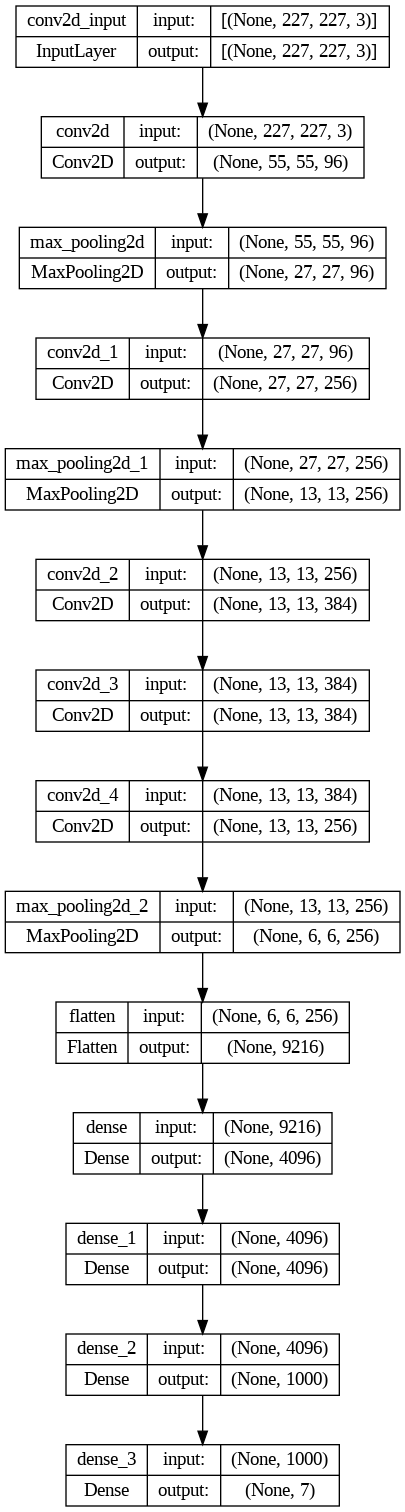

In [ ]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(model, to_file='convnet.png', show_shapes=True,show_layer_names=True)
Image(filename='convnet.png')

   steps_per_epoch=STEPS_PER_EPOCH,
      validation_steps=STEPS_PER_EPOCH

In [ ]:
history = model.fit(train_data_gen,epochs=25,validation_data=val_data_gen)

Epoch 1/25
449/449 [==============================] - 9347s 21s/step - loss: 1.8395 - accuracy: 0.2775 - val_loss: 1.6112 - val_accuracy: 0.3631
Epoch 2/25
449/449 [==============================] - 474s 1s/step - loss: 1.5247 - accuracy: 0.3990 - val_loss: 1.4178 - val_accuracy: 0.4576
Epoch 3/25
449/449 [==============================] - 473s 1s/step - loss: 1.3669 - accuracy: 0.4704 - val_loss: 1.3024 - val_accuracy: 0.4930
Epoch 4/25
449/449 [==============================] - 472s 1s/step - loss: 1.2486 - accuracy: 0.5173 - val_loss: 1.2658 - val_accuracy: 0.5180
Epoch 5/25
449/449 [==============================] - 471s 1s/step - loss: 1.1492 - accuracy: 0.5605 - val_loss: 1.2010 - val_accuracy: 0.5375
Epoch 6/25
449/449 [==============================] - 478s 1s/step - loss: 1.0555 - accuracy: 0.5982 - val_loss: 1.1929 - val_accuracy: 0.5538
Epoch 7/25
449/449 [==============================] - 472s 1s/step - loss: 0.9543 - accuracy: 0.6381 - val_loss: 1.1828 - val_accuracy: 0.56

UnknownError: ignored

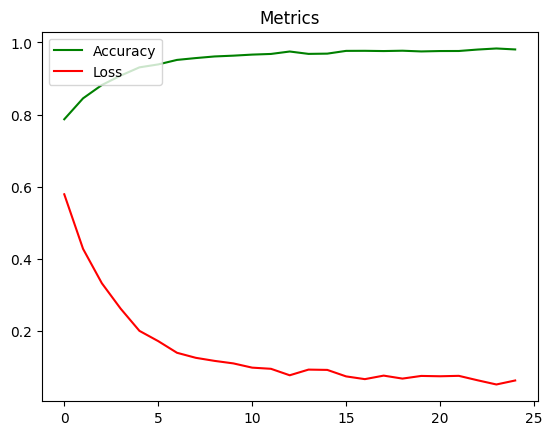

In [ ]:
def plot_hist(history):
    #plt.plot(history.history["val_sensitivity_at_specificity"], color='red')
    #plt.plot(history.history["val_auc"], color='blue')
    #plt.plot(history.history["val_specificity_at_sensitivity"], color='yellow')
    #plt.plot(history.history["val_accuracy"],color='blue')
    plt.plot(history.history["accuracy"],color='green')
    plt.plot(history.history["loss"],color='red')


    plt.title("Metrics")


    plt.legend(["Accuracy","Loss"], loc="upper left")
    plt.show()


plot_hist(history)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


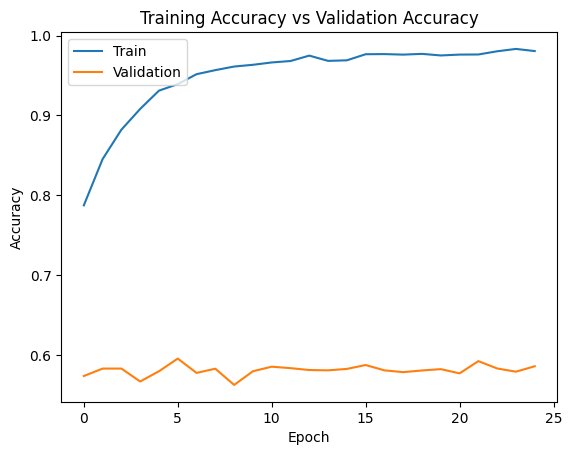

In [ ]:
print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [ ]:
history = model.fit(train_data_gen,epochs=25,validation_data=val_data_gen)

NameError: ignored

In [ ]:
history2=model.fit(train_data_gen,validation_data=val_data_gen,epochs = 15,verbose = 1)

Epoch 1/15
449/449 [==============================] - 545s 1s/step - loss: 0.0664 - accuracy: 0.9790 - val_loss: 2.8695 - val_accuracy: 0.5822
Epoch 2/15
449/449 [==============================] - 530s 1s/step - loss: 0.0708 - accuracy: 0.9780 - val_loss: 3.2102 - val_accuracy: 0.5867
Epoch 3/15
449/449 [==============================] - 526s 1s/step - loss: 0.0648 - accuracy: 0.9795 - val_loss: 3.0261 - val_accuracy: 0.5759
Epoch 4/15
449/449 [==============================] - 529s 1s/step - loss: 0.0672 - accuracy: 0.9795 - val_loss: 3.1807 - val_accuracy: 0.5818
Epoch 5/15
 93/449 [=====>........................] - ETA: 6:35 - loss: 0.0446 - accuracy: 0.9866